**Probing Kepler and TESS Eclipsing Binary star catalogs to search for entries present in the former catalog and not the latter. Specifically searching for Binaries missing from first two years of TESS operation, which includes the first 26 Sectors of data and includedin [Prsa et al. 2022](https://ui.adsabs.harvard.edu/abs/2022yCat..22580016P/abstract)** 

Villanova REU Project, Summer 2024-2025. Code written by Ronnie Banerjee, supervised and edited by Dr. Andrej Prsa. [Results published in RNAAS Journal](https://iopscience.iop.org/article/10.3847/2515-5172/ade853)

In [1]:
import sys 
print(sys.version)

3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import astroquery
from astroquery.simbad import Simbad #https://astroquery.readthedocs.io/en/latest/simbad/simbad.html
import lightkurve as lk
from astropy.io import ascii
import astropy.units as u
from astroquery.mast import Observations
from scipy.signal import find_peaks 

In [ ]:
#probing whole catalog, outputs whole kepler EB Catalog.
limitedSimbad = Simbad()
limitedSimbad.ROW_LIMIT = 25
eb = ascii.read('KIC_EBS.txt') #this doesn't freak out like np.loadtxt

kic = list(eb['col1'])

print(type(kic))
print(len(kic))
print(kic) #store kic ids


kicid = [] #store the full ids of kepler targets


In [ ]:
#output is all TIC IDs of Kepler EB entries if they exist.
limitedSimbad = Simbad()
limitedSimbad.ROW_LIMIT = 35

tic = [] #kic targets with tic ids
for i in kic[2450:2920]: #search thru kepler ebs in index chunks and and add KIC identifier to the id number
        kicid.append("KIC "+ str(i)) #lists are better


for x in kicid:#search list of kic ebs, KIC 8937663 is a problematic one why, cant even find tic id
    #print(x)
    result_table2 = Simbad.query_objectids(x) #use these to find this target in other catalogs
    
    for y in result_table2['ID']: #search the target's alternate ids
        if y.__contains__("TIC"):#if it has a tic id
            tic.append(y)
 


 print(tic)
#loop through, see if there are graphs available in sc for targets, if they aren't there, log those for further research 

In [ ]:
#use this list to search for targets and plot their tps
#output is list of stars both observed and not observed by TESS in short cadence

no_obs= []
sc_obs = []
for i in tic:
    lcsearch = lk.search_lightcurve(i, cadence = "short")
    dwn = lk.SearchResult.download(lcsearch) 
    if dwn is None: #if its not observed in sc aka no search result is found
        no_obs.append(i)
        continue #move on past the null
    else: #moving on and seeing if others have been observed
        sc_obs.append(i)
print("Observed in short cadence by TESS:", sc_obs)
print("\n Not observed by TESS in short cadence:", no_obs)



In [6]:
#finding Kepler EBs also observed by TESS in first 26 Sectors of data.
#outputs stars observed by TESS from the Kepler EB catalog that are not in VU catalog

for i in kic: #search thru kepler ebs and and add KIC identifier to the id number
        kicid.append("KIC "+ str(i)) #lists are better
no_obs2 = []
sc_obs2 = []
for i in sc_obs: #remove TIC identifier to easily compare with the catalog 
    sc_obs2.append( i.replace("TIC ", "") )
for i in no_obs: #remove TIC identifier to easily compare with the catalog 
    no_obs2.append( i.replace("TIC ", "") )
print("Kepler EBs observed by TESS in this sample:",len(sc_obs2))
#print(no_obs2)
eb2 = ascii.read('TESS_EB_catalog.csv')
#print(eb2)
tesscatalog = list(eb2['tess_id'])
tesscatalog = set(tesscatalog)

observed = set(sc_obs2)
not_observed = set(no_obs2)
missing_tics = list(observed.difference(tesscatalog))

print("EBs after filtering:",len(missing_tics))
print("KIC EBs that are not in VU catalog (TIC ID):",missing_tics) #two confirmed ebs are showing up here? the set doesn't show them


Kepler EBs observed by TESS in this sample: 568
EBs after filtering: 283
KIC EBs that are not in VU catalog (TIC ID): ['159443078', '268711054', '271763138', '172422432', '158791692', '351061627', '171584878', '159512595', '137414680', '271433551', '272177504', '394177355', '158324163', '273687627', '121988489', '267667927', '137220754', '159649612', '27773627', '164785576', '171878296', '170347611', '271546585', '274127085', '164729556', '122299251', '122685666', '273372823', '272718764', '138424223', '270522064', '137555691', '158420787', '123410791', '170740081', '159097856', '270856764', '169460096', '27846645', '122226990', '137890266', '159719826', '298969298', '299159803', '63293840', '271970252', '159106207', '399825512', '271772050', '158720466', '405685992', '158795062', '171502734', '159573888', '275575491', '351191325', '120254134', '164890208', '272841237', '351193098', '159716878', '122447138', '26960947', '417657237', '27390859', '272369124', '138648606', '273376048', '1

In [ ]:
#busy work. adding TIC to start of each ID for easier lightkurve search
missing_tic_withid  = []
for i in missing_tics: #re add tic identifier
        missing_tic_withid.append("TIC "+ str(i)) #lists are better
print(missing_tic_withid)
for x in missing_tic_withid:
    lc = lk.search_lightcurve(x, cadence = "short",mission = "TESS").download()
    print(type(lc))
    missing_collection = lk.LightCurveCollection.append(lc) #compile into one place
print(lc)


['TESS Sector 14' 'TESS Sector 40' 'TESS Sector 41' 'TESS Sector 54'
 'TESS Sector 55' 'TESS Sector 75' 'TESS Sector 80' 'TESS Sector 81'
 'TESS Sector 75' 'TESS Sector 80' 'TESS Sector 81' 'TESS Sector 14']
Eclipse indices: [  125   387   638   917  1203  1408  1622  1842  2052  2293  2546  2832
  3049  3385  3687  3998  4275  4520  4838  5044  8482  8767  9087  9352
  9598  9914 10127 10515 10722 10924 11144 11466 11681 11935 12254 12525
 12842 13045 13373 13722 14009 14231 14593 17847 18096 18385]
eclipse times: [1683.53036351 1683.92341947 1684.27897529 1684.67064219 1685.06925349
 1685.35397582 1685.65119813 1685.95675376 1686.24842047 1686.58314272
 1686.9345316  1687.33175377 1687.63314258 1688.12480908 1688.56647553
 1689.00953081 1689.40814162 1689.75536355 1690.20258534 1690.48869616
 1695.33035696 1695.72619023 1696.1720236  1697.50118273 1697.85534575
 1698.30117433 1698.59839332 1699.14005404 1699.4303286  1699.71088102
 1700.02059977 1700.46781692 1700.76642462 1701.11919

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 12 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


7.971982230463312 d


<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

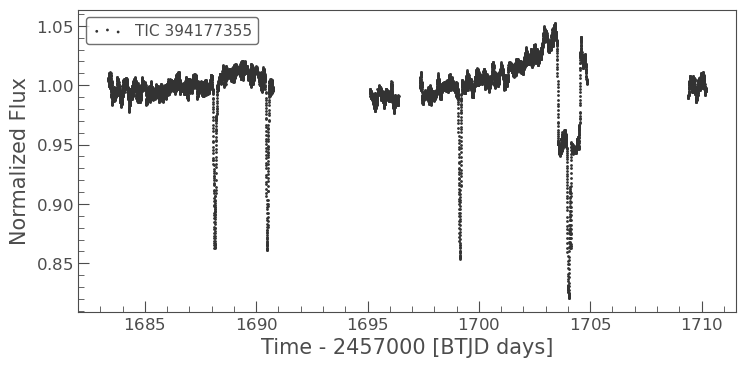

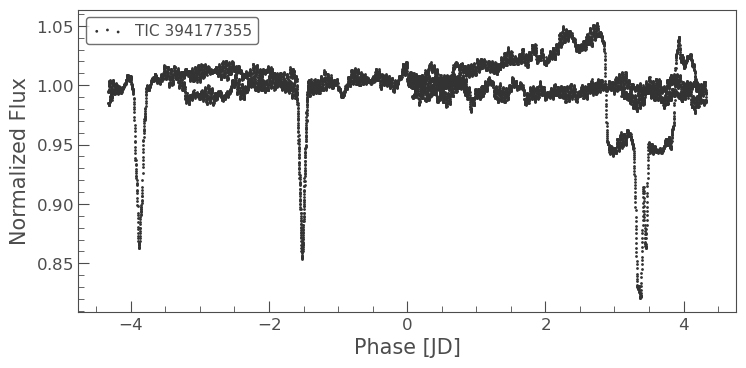

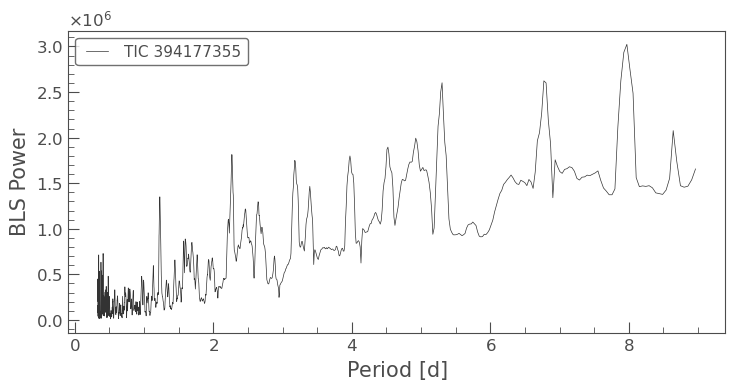

In [15]:
#not necessary for full running of script, just for visualizing data and finding which sectors.
#!! error message only refers to the code downloading first available data set

lcsearch = lk.search_lightcurve("TIC 394177355", cadence = "short",mission = "TESS")
print(lcsearch.mission) #which sectors
curve = lcsearch.download()
# Invert flux to turn minima into peaks
inv_flux = -curve.flux

# Find peaks in the inverted flux = minima in original flux
# You can tweak `distance` and `prominence` depending on your data
peaks, properties = find_peaks(inv_flux, distance=200, prominence=0.01)

# `peaks` now contains the indices of all candidate eclipses
print("Eclipse indices:", peaks)
eclipse_times = curve.time.value[peaks]
print("eclipse times:", eclipse_times)
curve = curve.normalize()
curve.scatter()
period = curve.to_periodogram("bls").period_at_max_power #take lc, grab max peak period
periodogram = curve.to_periodogram("bls")
print(period)
curve.fold(8.653092).scatter()
periodogram.plot()



In [ ]:
#consolodated missing Kepler EBs from pre Sector 26 into csv. getting curve data to subplot of all missing ebs
#output is each target's orbital period and a comfirmation of the initial number of missing targets before final vetting 

pre26 = ascii.read('Pre_Sec26_Kepler_EBs.csv')
print(pre26)
pre26 = list(pre26['col2'])
for i in range(len(pre26)):
    pre26[i] = "TIC " + str(pre26[i])

print(pre26)
plots = []
periods = []
graphs = []

for i in pre26:
    lcsearch = lk.search_lightcurve(i, cadence = "short") #store plotting data
    dwn = lk.SearchResult.download(lcsearch) 
    plots.append(dwn)
print(len(plots))
for x in range(len(plots)): #store max periods for phase folding
    pds = plots[x].to_periodogram("bls").period_at_max_power
    periods.append(pds)
print(periods)
print(len(periods))


maybe t0:  1697.7324836811554
raw phase: [-0.49999842 -0.49998855 -0.49989211 ...  0.49971864  0.49986017
  0.49995801]
raw flux: [4008.9617 4030.3955 3994.2183 ... 4012.5947 4018.1392 3999.583 ]
aliased phases: [-0.59997068 -0.59997055 -0.5998899  ...  0.59986128  0.59995736
  0.59997256]
min phase:  0.0
norm flux: [1.0010968  0.99698484 0.9983953  ... 0.996861   0.99381083 0.9977637 ]
maybe t0:  1688.103504750656
raw phase: [-0.4999805  -0.49994212 -0.49991671 ...  0.49978784  0.49979745
  0.49997972]
raw flux: [-197604.93424788 -221644.38861825 -199726.28298055 ... -213405.82080611
              nan -224309.04308524]
aliased phases: [-0.5999691  -0.59991313 -0.59990343 ...  0.59979487  0.59980372
  0.59996714]
min phase:  0.0
norm flux: [ 0.50330855  0.22776247 -0.36286015 ... -0.3649231   0.43097505
  0.00310876]
maybe t0:  3316.987027442519
raw phase: [-0.4999026  -0.49980918 -0.4997713  ...  0.49977258  0.49984129
  0.49997019]
raw flux: [0.9857258  0.98763317 0.99133545 ... 0.98

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/astropy/utils/decorators.py:604: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


raw phase: [-0.4999789  -0.49994171 -0.49986346 ...  0.49986059  0.49989779
  0.49997603]
raw flux: [      nan 77597.99  80624.96  ...       nan 77526.7   80609.445]
aliased phases: [-0.59997516 -0.5999381  -0.59985862 ...  0.59985692  0.59989416
  0.59997116]
min phase:  -0.4340560698116824
norm flux: [       nan 0.99735004 1.0319371  ... 0.9923272  1.0017852  0.94902164]
maybe t0:  2433.9836529339223
raw phase: [-0.49994004 -0.49991258 -0.49982077 ...  0.49993369  0.49994124
  0.49998027]
raw flux: [2135.103  2146.6506 2129.7498 ... 2126.5405 2124.2585 2138.182 ]
aliased phases: [-0.59998495 -0.59990412 -0.59986909 ...  0.59989066  0.59989714
  0.59994546]
min phase:  0.0
norm flux: [1.0024198 0.9978577 1.003712  ... 0.9995805 0.9936534 0.9983134]
maybe t0:  3338.017303596822
raw phase: [-0.49666667 -0.49666667 -0.49666667 ...  0.5         0.5
  0.5       ]
raw flux: [0.97324246 0.97898042 0.98455554 ... 0.97305357 0.96808708 0.9782545 ]
aliased phases: [-0.59666667 -0.59666667 -0.59

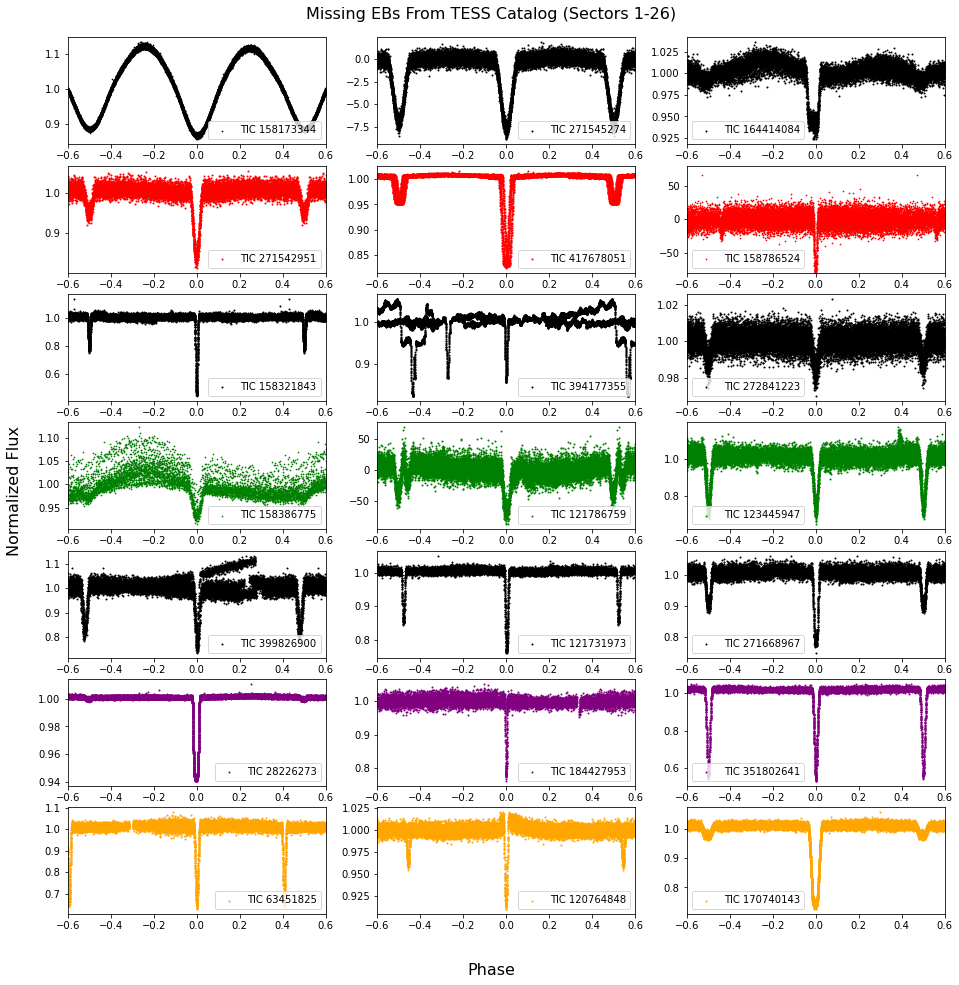

In [17]:
#code for plotting light curves of all missing kepler targets from TESS catalog, plotted +/-0.6 phase to see full shape of eclipse


fig, ax = plt.subplots(7, 3, sharex=False, figsize=(14, 14)) #don't share the x axis, it completely ruins the plots
fig.suptitle('Missing EBs From TESS Catalog (Sectors 1-26)', fontsize=16)
fig.text(0.5, 0.02, 'Phase', ha='center',fontsize=16)
fig.text(0.02, 0.5, 'Normalized Flux', va='center', rotation='vertical',fontsize=16)
fig.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.08)

# Define metadata for each target, ensuring custom color, inverting for negative fluxes, position, point size.
targets = [ #could automate this f
    {"index": 0, "period": 0.89291993, "label": "TIC 158173344", "epoch time": 1683.35612, "pos": (0,0), "color": "black", "invert": False, "s": 0.5},
    {"index": 1, "period": 1.546289, "label": "TIC 271545274", "epoch time": 1683.35624,"pos": (0,1), "color": "black", "invert": True, "s": 1},
    {"index": 2, "period": 3.905597, "label": "TIC 164414084", "pos": (0,2), "epoch time": 1683.36422,"color": "black", "invert": False, "s": 1},
    {"index": 3, "period": 4.007705, "label": "TIC 271542951", "pos": (1,0),"epoch time": 3334.1230258120218, "color": "r", "invert": False, "s": 1},
    {"index": 4, "period": proper_periods[4], "label": "TIC 417678051", "epoch time": 2408.3715923784175,"pos": (1,1), "color": "r", "invert": False, "s": 1},
    {"index": 5, "period": 7.095207, "label": "TIC 158786524", "pos": (1,2),"epoch time": 1683.35608, "color": "r", "invert": True, "s": 0.5, "ylim": (-80, 80)},
    {"index": 6, "period": 8.429438, "label": "TIC 158321843","epoch time": 2010.26923, "pos": (2,0), "color": "black", "invert": False, "s": 1},
    {"index": 7, "period": 8.653092, "label": "TIC 394177355", "epoch time": 1699.14005404,"pos": (2,1), "color": "black", "invert": False, "s": 1},
    {"index": 8, "period": 1.175878, "label": "TIC 272841223", "epoch time": 2419.99189,"pos": (2,2), "color": "black", "invert": False, "s": 1},
    {"index": 9, "period": 1.570919, "label": "TIC 158386775", "epoch time": 1683.36394,"pos": (3,0), "color": "green", "invert": False, "s": 0.5, "bin": True},
    {"index": 10, "period": 9.524076, "label": "TIC 121786759", "epoch time": 1683.35671,"pos": (3,1), "color": "green", "invert": True, "s": 1},
    {"index": 11, "period": 6.207461, "label": "TIC 123445947", "epoch time": 3316.7028932259013,"pos": (3,2), "color": "green", "invert": False, "s": 1},
    {"index": 12, "period": proper_periods[12], "label": "TIC 399826900","epoch time": 3331.0893231114283, "pos": (4,0), "color": "black", "invert": False, "s": 1},
    {"index": 13, "period": proper_periods[13], "label": "TIC 121731973","epoch time": 1683.36381, "pos": (4,1), "color": "black", "invert": False, "s": 1},
    {"index": 14, "period": 7.649413, "label": "TIC 271668967", "pos": (4,2),"epoch time": 3334.9889576742225, "color": "black", "invert": False, "s": 1},
    {"index": 15, "period": 5.889372, "label": "TIC 28226273", "pos": (5,0), "epoch time": 423.36798352782944,"color": "purple", "invert": False, "s": 1},
    {"index": 16, "period": 17.844325, "label": "TIC 184427953", "pos": (5,1), "epoch time": 3319.988736480789,"color": "purple", "invert": False, "s": 1},
    {"index": 17, "period": 10.466902, "label": "TIC 351802641", "pos": (5,2),"epoch time": 3314.701803651641, "color": "purple", "invert": False, "s": 1},
    {"index": 18, "period": 14.759479, "label": "TIC 63451825", "pos": (6,0),"epoch time": 3330.4611146076204, "color": "orange", "invert": False, "s": 1},
    {"index": 19, "period": proper_periods[19], "label": "TIC 120764848","epoch time": 1683.35674, "pos": (6,1), "color": "orange", "invert": False, "s": 1},
    {"index": 20, "period": 2.151383, "label": "TIC 170740143", "pos": (6,2),"epoch time": 3339.78163, "color": "orange", "invert": False, "s": 1}
]
for target in targets:
    i = target["index"] #store target data as variables to call
    period = target["period"]
    pos = target["pos"]
    label = target["label"]
    color = target["color"]
    s = target["s"]
    epoch_time = target["epoch time"]
    invert = target.get("invert", False)
    ylim = target.get("ylim", None)
    bin_data = target.get("bin", False)

    lc = plots[i].bin(time_bin_size=period / 300) if bin_data else plots[i]
    og_time = lc.time #ensure the right t0 is used otherwise it won't center. the circus act of shifting the plot is not worth it lol.
    min_index = np.nanargmin(lc.flux) #find locattion of minimum flux with single function call
    estimated_t0 = og_time[min_index].value #get the time val of this min, this did cause an issue for tic 394177355 bc it's werid
    print("maybe t0: ", estimated_t0)
    # Initial fold (no wrap yet) just to find min location
    lc_folded_raw = lc.fold(period, epoch_time = estimated_t0, normalize_phase=True)
    if label == "TIC 394177355":
        lc_folded_raw = lc.fold(period, t0 = 1699.14005404, normalize_phase=True)
        print("TIC 394177355 detected, not using min t0")
        
    lc_folded_raw.time = lc_folded_raw.time * u.dimensionless_unscaled
    phases = np.array(lc_folded_raw.time.value)#index the full one even with respect to another array?
    fluxes = np.array(lc_folded_raw.flux.value)#combine fractions of a folded plot
    print("raw phase:", phases)
    print("raw flux:",fluxes)
    aliased_phases = np.concatenate([phases[phases > 0.4]-1, phases, phases[phases < -0.4]+1]) #limit the phase range
    aliased_fluxes = np.concatenate([fluxes[phases > 0.4], fluxes, fluxes[phases < -0.4]]) 
    print("aliased phases:", aliased_phases)
    
    min_phase = aliased_phases[np.nanargmin(aliased_fluxes)]
    print("min phase: ", min_phase)
    # Check if primary eclipse is already near 0 (within tolerance)
    
   
    
    norm_flux = aliased_fluxes / np.nanmean(aliased_fluxes)
    print("norm flux:", norm_flux)
    
    if invert:
        norm_flux *= -1
        
#     sort_idx = np.argsort(shifted_phases)
#     final_phases = final_phases[sort_idx]
#     final_flux = final_flux[sort_idx]
    # Keep only data in [-0.6, 0.6]
    ax[pos].scatter(aliased_phases, norm_flux, label=label, color=color, s=s)
    ax[pos].legend(loc='lower right' if pos[1] in [0, 1] else 'lower left')
    ax[pos].set_xlim(-0.6, 0.6)
    if ylim:
        ax[pos].set_ylim(*ylim)


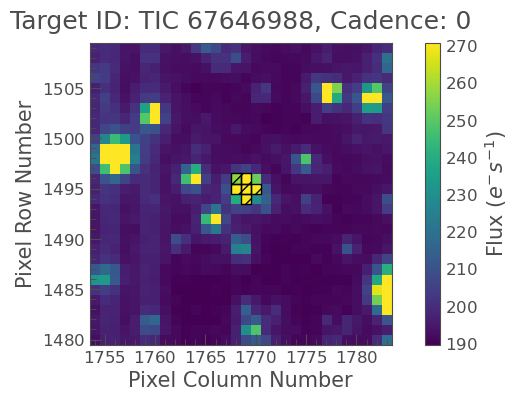

In [6]:
#ran each target through this search to ensure target's signal does not overlap with neighbors, checked neighbors on mast.
search_result = lk.search_tesscut("TIC 67646988",sector= 21)
tpf = search_result.download(cutout_size=30)

target_mask = tpf.create_threshold_mask(threshold=20, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels
tpf.plot(aperture_mask=target_mask, mask_color='k');


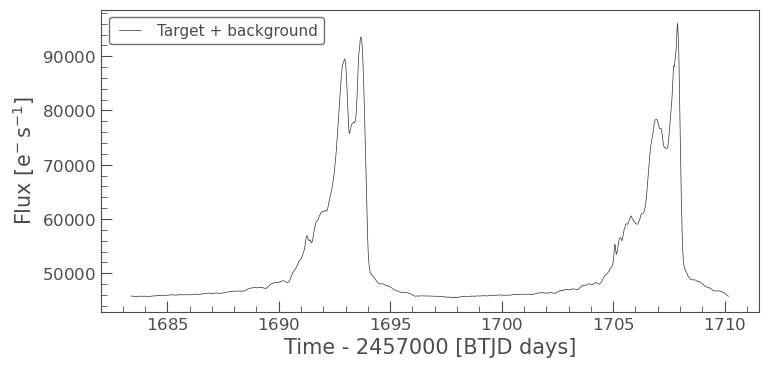

In [9]:
target_lc = tpf.to_lightcurve(aperture_mask=target_mask)
target_lc.plot(label='Target + background');